In [1]:
%matplotlib inline
%config InlineBackend.figure_formats={'png','retina'}

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.layers.recurrent import LSTM
from keras.layers import Dropout

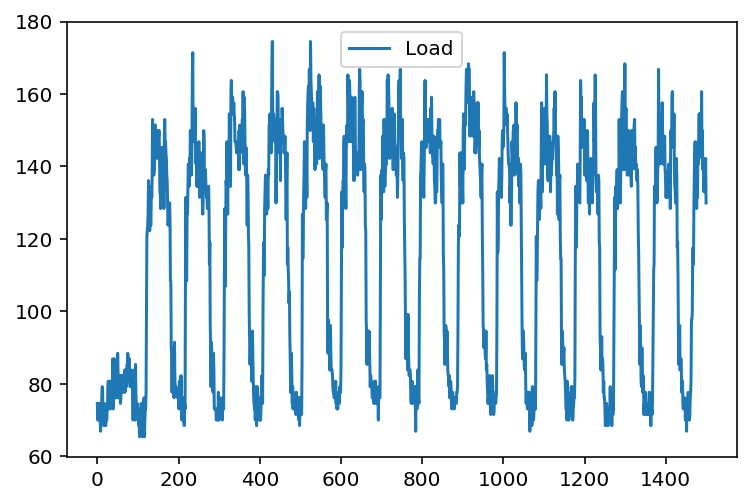

In [5]:
df=pd.read_csv("DataFiles/elec_load.csv",error_bad_lines=False)
plt.subplot()
plot_test,=plt.plot(df.values[:1500],label='Load')
plt.legend(handles=[plot_test])

                Load
count  140256.000000
mean      145.332503
std        48.477976
min         0.000000
25%       106.850998
50%       151.428571
75%       177.557604
max       338.218126


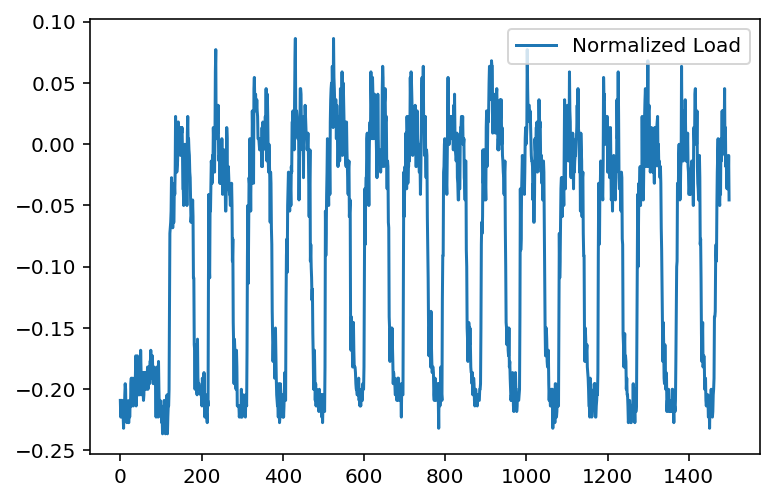

In [6]:
print(df.describe())
array=(df.values-145.33)/ 338.21
plt.subplot()
plot_test,=plt.plot(array[:1500],label='Normalized Load')
plt.legend(handles=[plot_test])

In [8]:
listX=[]
listy=[]
X={}
y={}

for i in range(0,len(array)-6):
    listX.append(array[i:i+5].reshape([5,1]))
    listy.append(array[i+6])

arrayX=np.array(listX)
arrayy=np.array(listy)

X['train']=arrayX[0:13000]
X['test']=arrayX[13000:14000]


y['train']=arrayy[0:13000]
y['test']=arrayy[0:13000]

In [9]:
model=Sequential()

model.add(LSTM(units=50,input_shape=(None,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=200,input_shape=(None,100),return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation("linear"))

model.compile(loss="mse",optimizer="rmsprop")


In [ ]:
model.fit(X['train'],y['train'],batch_size=1000,epochs=3,validation_split=0.08)


In [ ]:
test_results = model.predict( X['test'])

test_results = test_results * 338.21 + 145.33
y['test'] = y['test'] * 338.21 + 145.33

plt.figure(figsize=(15,10))
plot_predicted, = plt.plot(test_results, label='predicted')

plot_test, = plt.plot(y['test']  , label='test');
plt.legend(handles=[plot_predicted, plot_test]);